## data cleanning and exploration

In [9]:
import pandas as pd

# Load the datasets
non_parametric_data = pd.read_csv('non_parametric_tests_data.csv')
retail_sales_data = pd.read_csv('retail_sales_data.csv')

# Convert 'Date' column to datetime format in retail sales data
retail_sales_data['Date'] = pd.to_datetime(retail_sales_data['Date'])

# Summary statistics
print("Non-Parametric Dataset Summary:")
print(non_parametric_data.describe())

print("\nRetail Sales Dataset Summary:")
print(retail_sales_data.describe())
# Check for duplicates
print(f"Non-Parametric Dataset Duplicates: {non_parametric_data.duplicated().sum()}")
print(f"Retail Sales Dataset Duplicates: {retail_sales_data.duplicated().sum()}")

Non-Parametric Dataset Summary:
       Customer_ID  Satisfaction_Score  Satisfaction_Before  \
count   100.000000          100.000000           100.000000   
mean     50.500000            5.377319             5.650365   
std      29.011492            2.707247             2.685168   
min       1.000000            1.049699             1.045554   
25%      25.750000            3.197518             3.171517   
50%      50.500000            5.347047             6.055792   
75%      75.250000            7.943626             7.752461   
max     100.000000            9.881982             9.870854   

       Satisfaction_After  Median_Income      Diet_A      Diet_B      Diet_C  
count          100.000000     100.000000  100.000000  100.000000  100.000000  
mean             5.657554   52020.482924  118.141300  125.039539  128.500916  
std              2.865729    4702.210221   15.374422   15.008179   15.639873  
min              0.145554   41442.469241   85.471183   87.925332   89.546700  
25%  

## Non-Parametric Test (Wilcoxon Signed-Rank Test)

In [14]:
from scipy.stats import wilcoxon

# Wilcoxon signed-rank test for satisfaction scores before and after
stat, p_value = wilcoxon(
    non_parametric_data["Satisfaction_Before"],
    non_parametric_data["Satisfaction_After"]
)

print(f"Wilcoxon Test Statistic: {stat}")
print(f"Wilcoxon p-value: {p_value}")

Wilcoxon Test Statistic: 2505.0
Wilcoxon p-value: 0.9451754865571346


#### Visualizing Satisfaction Scores and Sales Trends

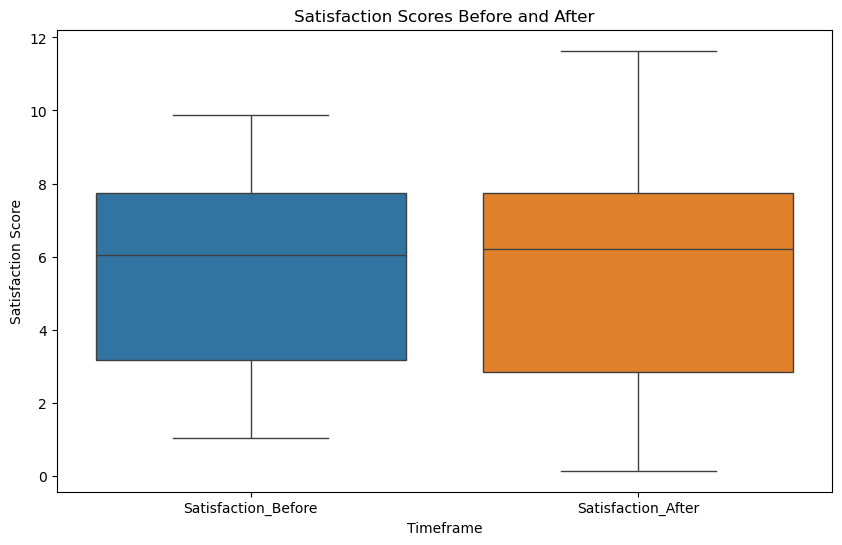

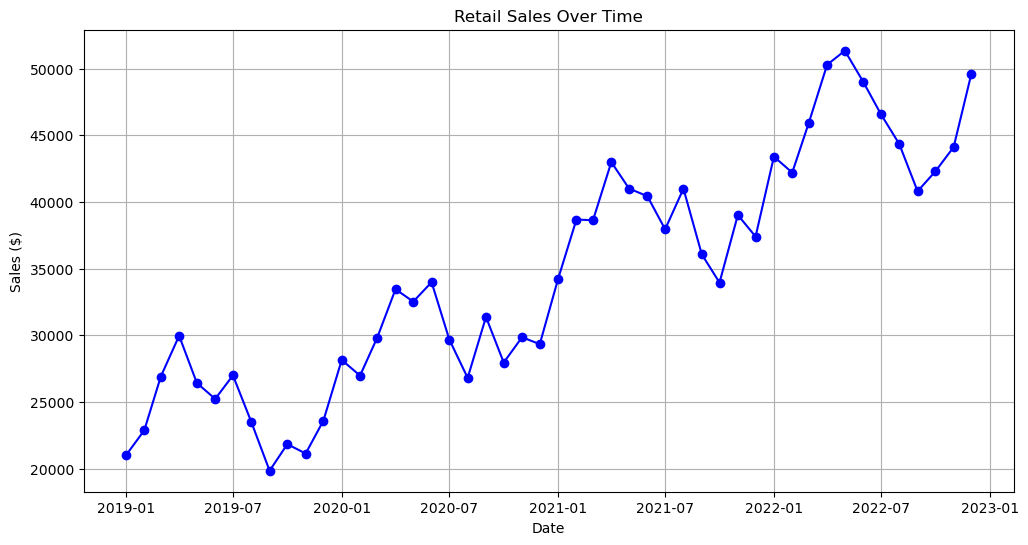

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize satisfaction scores before and after
plt.figure(figsize=(10, 6))
sns.boxplot(data=non_parametric_data[["Satisfaction_Before", "Satisfaction_After"]])
plt.title("Satisfaction Scores Before and After")
plt.ylabel("Satisfaction Score")
plt.xlabel("Timeframe")
plt.show()

# Visualize retail sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(retail_sales_data["Date"], retail_sales_data["Sales"], marker="o", linestyle="-", color="blue")
plt.title("Retail Sales Over Time")
plt.ylabel("Sales ($)")
plt.xlabel("Date")
plt.grid(True)
plt.show()


## Building a Predictive Model (Retail Sales)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature engineering (e.g., using 'Date' to create time-based features)
retail_sales_data['Month'] = retail_sales_data['Date'].dt.month
retail_sales_data['Year'] = retail_sales_data['Date'].dt.year

# Prepare features (X) and target (y)
X = retail_sales_data[['Month', 'Year']]
y = retail_sales_data['Sales']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 13189446.096373336
